<a href="https://colab.research.google.com/github/scysco/ONE-CHALLENGE-alura_store/blob/main/Challenge_AluraStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [76]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [78]:
tiendas_dfs = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_por_tienda = {}
colores = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']

#1. Análisis de facturación



In [79]:
for i, df in enumerate(tiendas_dfs):
  ingresos = df['Precio'].sum()
  ingresos_por_tienda[nombres_tiendas[i]] = ingresos
  print(f"Ingresos de la {nombres_tiendas[i]}: ${ingresos:,.2f}")

Ingresos de la Tienda 1: $1,150,880,400.00
Ingresos de la Tienda 2: $1,116,343,500.00
Ingresos de la Tienda 3: $1,098,019,600.00
Ingresos de la Tienda 4: $1,038,375,700.00


# Grafica

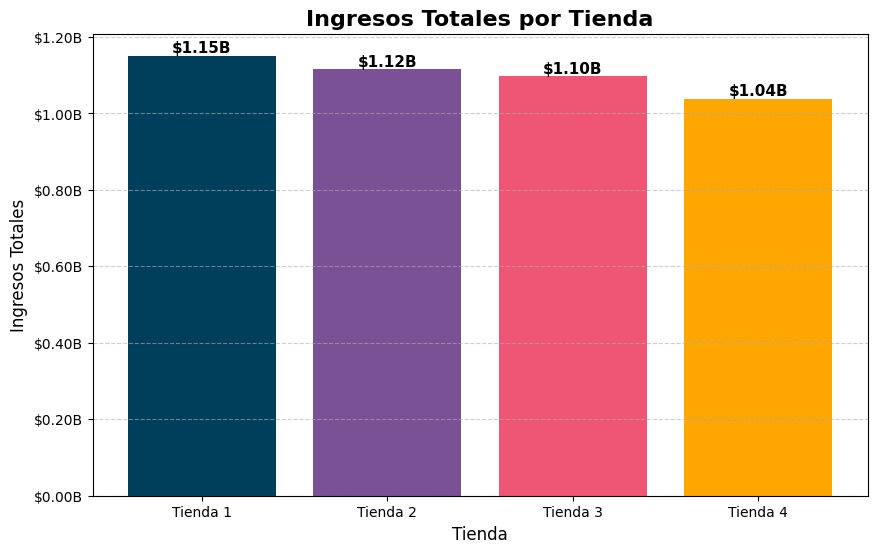

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(
    ingresos_por_tienda.keys(),
    ingresos_por_tienda.values(),
    color=colores
)

formatter = mticker.FuncFormatter(lambda x, p: f'${x/1e9:.2f}B')
ax.yaxis.set_major_formatter(formatter)

ax.set_title('Ingresos Totales por Tienda', fontsize=16, weight='bold')
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Ingresos Totales', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    label = f"${yval/1e9:.2f}B"
    ax.text(
        bar.get_x() + bar.get_width()/2.0,
        yval,
        label,
        va='bottom',
        ha='center',
        fontsize=11,
        weight='bold'
    )

plt.show()

# 2. Ventas por categoría

In [81]:
cantidad_por_categoria_t1 = tienda1.groupby('Categoría del Producto').size()
print("Cantidad de ventas por categoría para la Tienda 1:")
print(cantidad_por_categoria_t1)

Cantidad de ventas por categoría para la Tienda 1:
Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
dtype: int64


In [82]:
cantidad_por_categoria_t2 = tienda2.groupby('Categoría del Producto').size()
print("Cantidad de ventas por categoría para la Tienda 2:")
print(cantidad_por_categoria_t2)

Cantidad de ventas por categoría para la Tienda 2:
Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
dtype: int64


In [84]:
cantidad_por_categoria_t3 = tienda3.groupby('Categoría del Producto').size()
print("Cantidad de ventas por categoría para la Tienda 3:")
print(cantidad_por_categoria_t3)

Cantidad de ventas por categoría para la Tienda 3:
Categoría del Producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumentos musicales     177
Juguetes                   315
Libros                     185
Muebles                    499
dtype: int64


In [83]:
cantidad_por_categoria_t4 = tienda4.groupby('Categoría del Producto').size()
print("Cantidad de ventas por categoría para la Tienda 4:")
print(cantidad_por_categoria_t4)

Cantidad de ventas por categoría para la Tienda 4:
Categoría del Producto
Artículos para el hogar    201
Deportes y diversión       277
Electrodomésticos          254
Electrónicos               451
Instrumentos musicales     170
Juguetes                   338
Libros                     187
Muebles                    480
dtype: int64


# Grafica

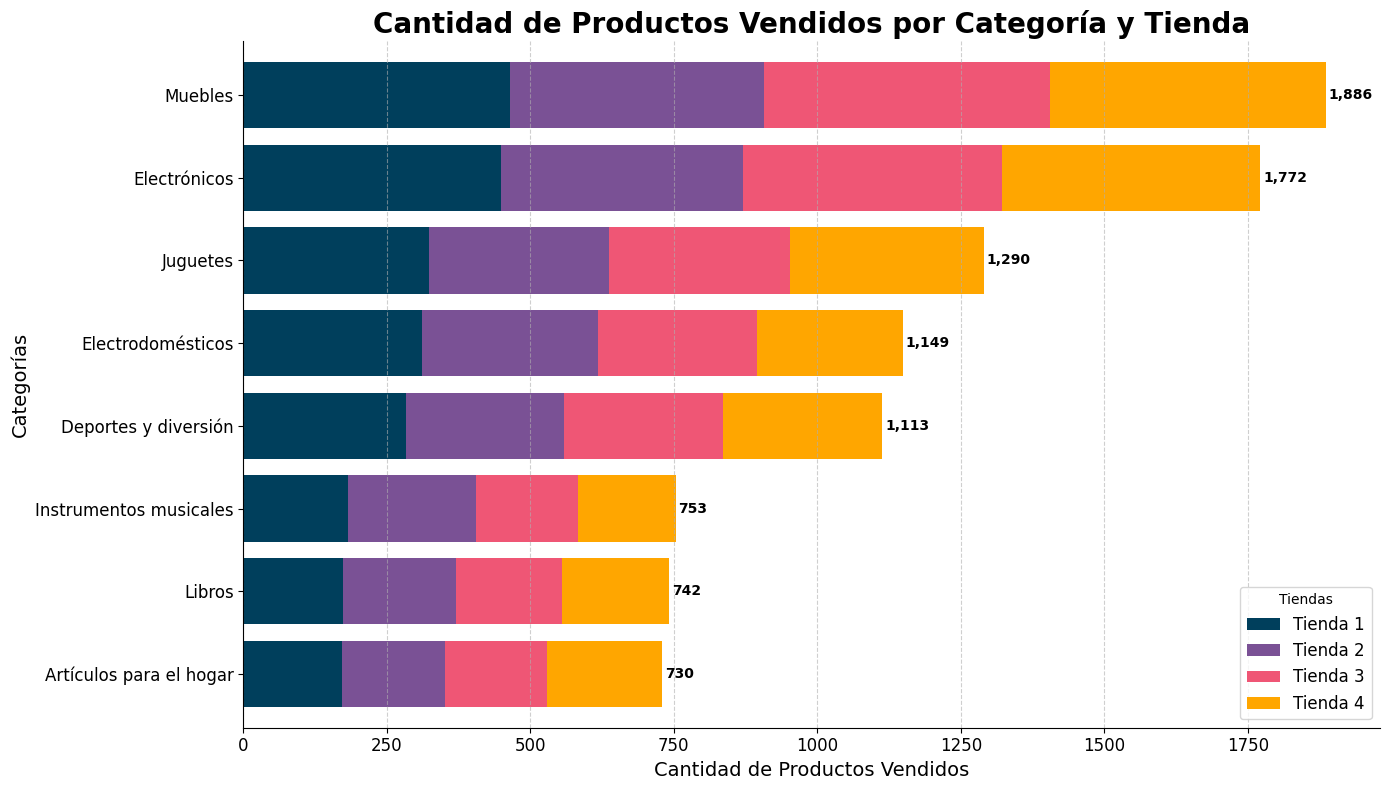

In [86]:
# Agrupo ventas por categoria

cantidad_consolidadas = pd.DataFrame({
    'Tienda 1': cantidad_por_categoria_t1,
    'Tienda 2': cantidad_por_categoria_t2,
    'Tienda 3': cantidad_por_categoria_t3,
    'Tienda 4': cantidad_por_categoria_t4
})

cantidad_consolidadas = cantidad_consolidadas.fillna(0)

cantidad_consolidadas['Total'] = cantidad_consolidadas.sum(axis=1)
cantidad_consolidadas = cantidad_consolidadas.sort_values(by='Total', ascending=True)
cantidad_consolidadas = cantidad_consolidadas.drop(columns='Total')


# Grafica

ax = cantidad_consolidadas.plot(
    kind='barh',
    stacked=True,
    color=colores,
    figsize=(14, 8),
    width=0.8
)

plt.title('Cantidad de Productos Vendidos por Categoría y Tienda', fontsize=20, weight='bold')
plt.xlabel('Cantidad de Productos Vendidos', fontsize=14)
plt.ylabel('Categorías', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Tiendas', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

totales_unidades = cantidad_consolidadas.sum(axis=1)

for i, total in enumerate(totales_unidades):
    ax.text(
        total + 5,
        i,
        f'{total:,.0f}',
        va='center',
        ha='left',
        weight='bold',
        fontsize=10
    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [87]:
calificaciones = {}
for i, df in enumerate(tiendas_dfs):
    calificacion_promedio = df['Calificación'].mean()
    calificaciones[nombres_tiendas[i]] = calificacion_promedio
    print(f"Calificación promedio de la {nombres_tiendas[i]}: {calificacion_promedio:.2f}")

Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


# Grafica

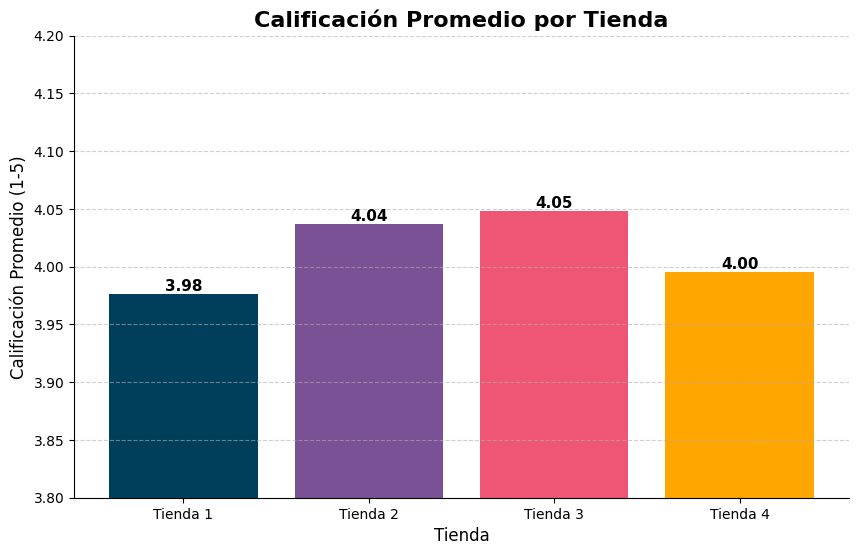

In [88]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(
    calificaciones.keys(),
    calificaciones.values(),
    color=colores
)

ax.set_ylim(3.8, 4.2)

ax.set_title('Calificación Promedio por Tienda', fontsize=16, weight='bold')
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Calificación Promedio (1-5)', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    label = f"{yval:.2f}"
    ax.text(
        bar.get_x() + bar.get_width()/2.0,
        yval,
        label,
        va='bottom',
        ha='center',
        fontsize=11,
        weight='bold'
    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


# 4. Productos más y menos vendidos

In [89]:
# Tienda 1
productos_vendidos_t1 = tienda1['Producto'].value_counts()

print("Top 5 productos más vendidos en la Tienda 1:")
print(productos_vendidos_t1.head())

print("\nTop 5 productos menos vendidos en la Tienda 1:")
print(productos_vendidos_t1.tail())

Top 5 productos más vendidos en la Tienda 1:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Top 5 productos menos vendidos en la Tienda 1:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


In [90]:
# Tienda 2
productos_vendidos_t2 = tienda2['Producto'].value_counts()

print("Top 5 productos más vendidos en la Tienda 2:")
print(productos_vendidos_t2.head())

print("\nTop 5 productos menos vendidos en la Tienda 2:")
print(productos_vendidos_t2.tail())

Top 5 productos más vendidos en la Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Top 5 productos menos vendidos en la Tienda 2:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


In [91]:
# Tienda 3
productos_vendidos_t3 = tienda3['Producto'].value_counts()

print("Top 5 productos más vendidos en la Tienda 3:")
print(productos_vendidos_t3.head())

print("\nTop 5 productos menos vendidos en la Tienda 3:")
print(productos_vendidos_t3.tail())

Top 5 productos más vendidos en la Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Top 5 productos menos vendidos en la Tienda 3:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


In [92]:
# Tienda 4
productos_vendidos_t4 = tienda4['Producto'].value_counts()

print("Top 5 productos más vendidos en la Tienda 4:")
print(productos_vendidos_t4.head())

print("\nTop 5 productos menos vendidos en la Tienda 4:")
print(productos_vendidos_t4.tail())

Top 5 productos más vendidos en la Tienda 4:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64

Top 5 productos menos vendidos en la Tienda 4:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


# 5. Envío promedio por tienda

In [93]:
costos_envio = {}
for i, df in enumerate(tiendas_dfs):
    envio_promedio = df['Costo de envío'].mean()
    costos_envio[nombres_tiendas[i]] = envio_promedio
    print(f"Costo de envío promedio de la {nombres_tiendas[i]}: ${envio_promedio:,.2f}")

Costo de envío promedio de la Tienda 1: $26,018.61
Costo de envío promedio de la Tienda 2: $25,216.24
Costo de envío promedio de la Tienda 3: $24,805.68
Costo de envío promedio de la Tienda 4: $23,459.46


# **MI ANALISIS**

Recomendación: **Vender la Tienda 4.**

Aquí presento mi argumento completo:

1. **Rendimiento Fundamental (Ingresos y Volumen)**
* Ingresos (Valor): La Tienda 4 es, sin lugar a dudas, la que menos dinero genera, con una diferencia de más de **$112 millones** respecto a la tienda líder. *Mi primer gráfica de barras lo demuestra visualmente*.
* Volumen de Ventas (Cantidad): El análisis por cantidad de productos vendidos nos dice que el problema no es solo que venda artículos más baratos, sino que simplemente tiene menos transacciones.* La gráfica de barras apiladas mostró que su contribución en las categorías más populares es la más baja*.

**Conclusión de este punto:** La tienda es la de menor rendimiento, tanto en valor monetario como en actividad de ventas.

2. **Rendimiento a lo Largo del Tiempo (Evolución Temporal)**
* Además hice un análisis más que muestro a continuación:

/tmp/ipython-input-94-3292104529.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = ventas_totales.groupby('Tienda').resample('M', on='Fecha')['Precio'].sum()


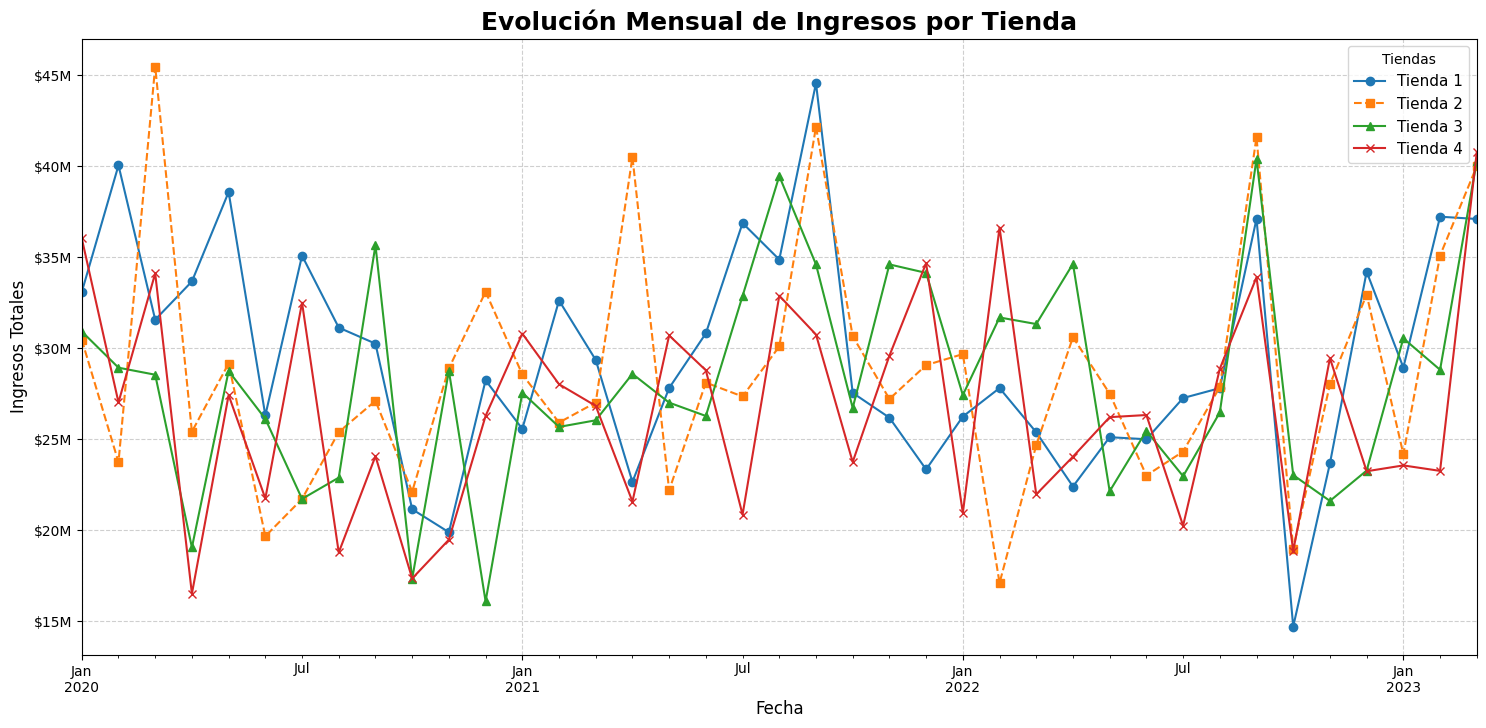

In [94]:
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4])
ventas_totales['Fecha'] = pd.to_datetime(ventas_totales['Fecha de Compra'], format='%d/%m/%Y')
ventas_mensuales = ventas_totales.groupby('Tienda').resample('M', on='Fecha')['Precio'].sum()
evolucion_ventas = ventas_mensuales.unstack(level='Tienda')

# Grafica
ax = evolucion_ventas.plot(
    kind='line',
    figsize=(18, 8),
    style=['o-', 's--', '^-', 'x-']
)

plt.title('Evolución Mensual de Ingresos por Tienda', fontsize=18, weight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ingresos Totales', fontsize=12)
plt.legend(title='Tiendas', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

formatter = mticker.FuncFormatter(lambda x, p: f'${x/1_000_000:.0f}M')
ax.yaxis.set_major_formatter(formatter)

plt.show()

Como vemos en la gráfica de líneas nos muestra que el bajo rendimiento de la Tienda 4 no es una caída reciente, sino una tendencia constante. Mes a mes, se mantiene como la línea más baja, indicando un problema crónico y no una mala racha.

**Conclusión de este punto**: No hay una perspectiva clara de mejora, ya que su desempeño ha sido históricamente inferior.

3. **Factores Internos (Vendedores y Calificaciones)**
* **Calificaciones**: Como vimos, todas las tiendas tienen una satisfacción del cliente muy similar y positiva. Este factor no es un diferenciador y no ayuda a "salvar" a la Tienda 4, ¿Por qué? Bueno, lo explicaré con una gráfica más.

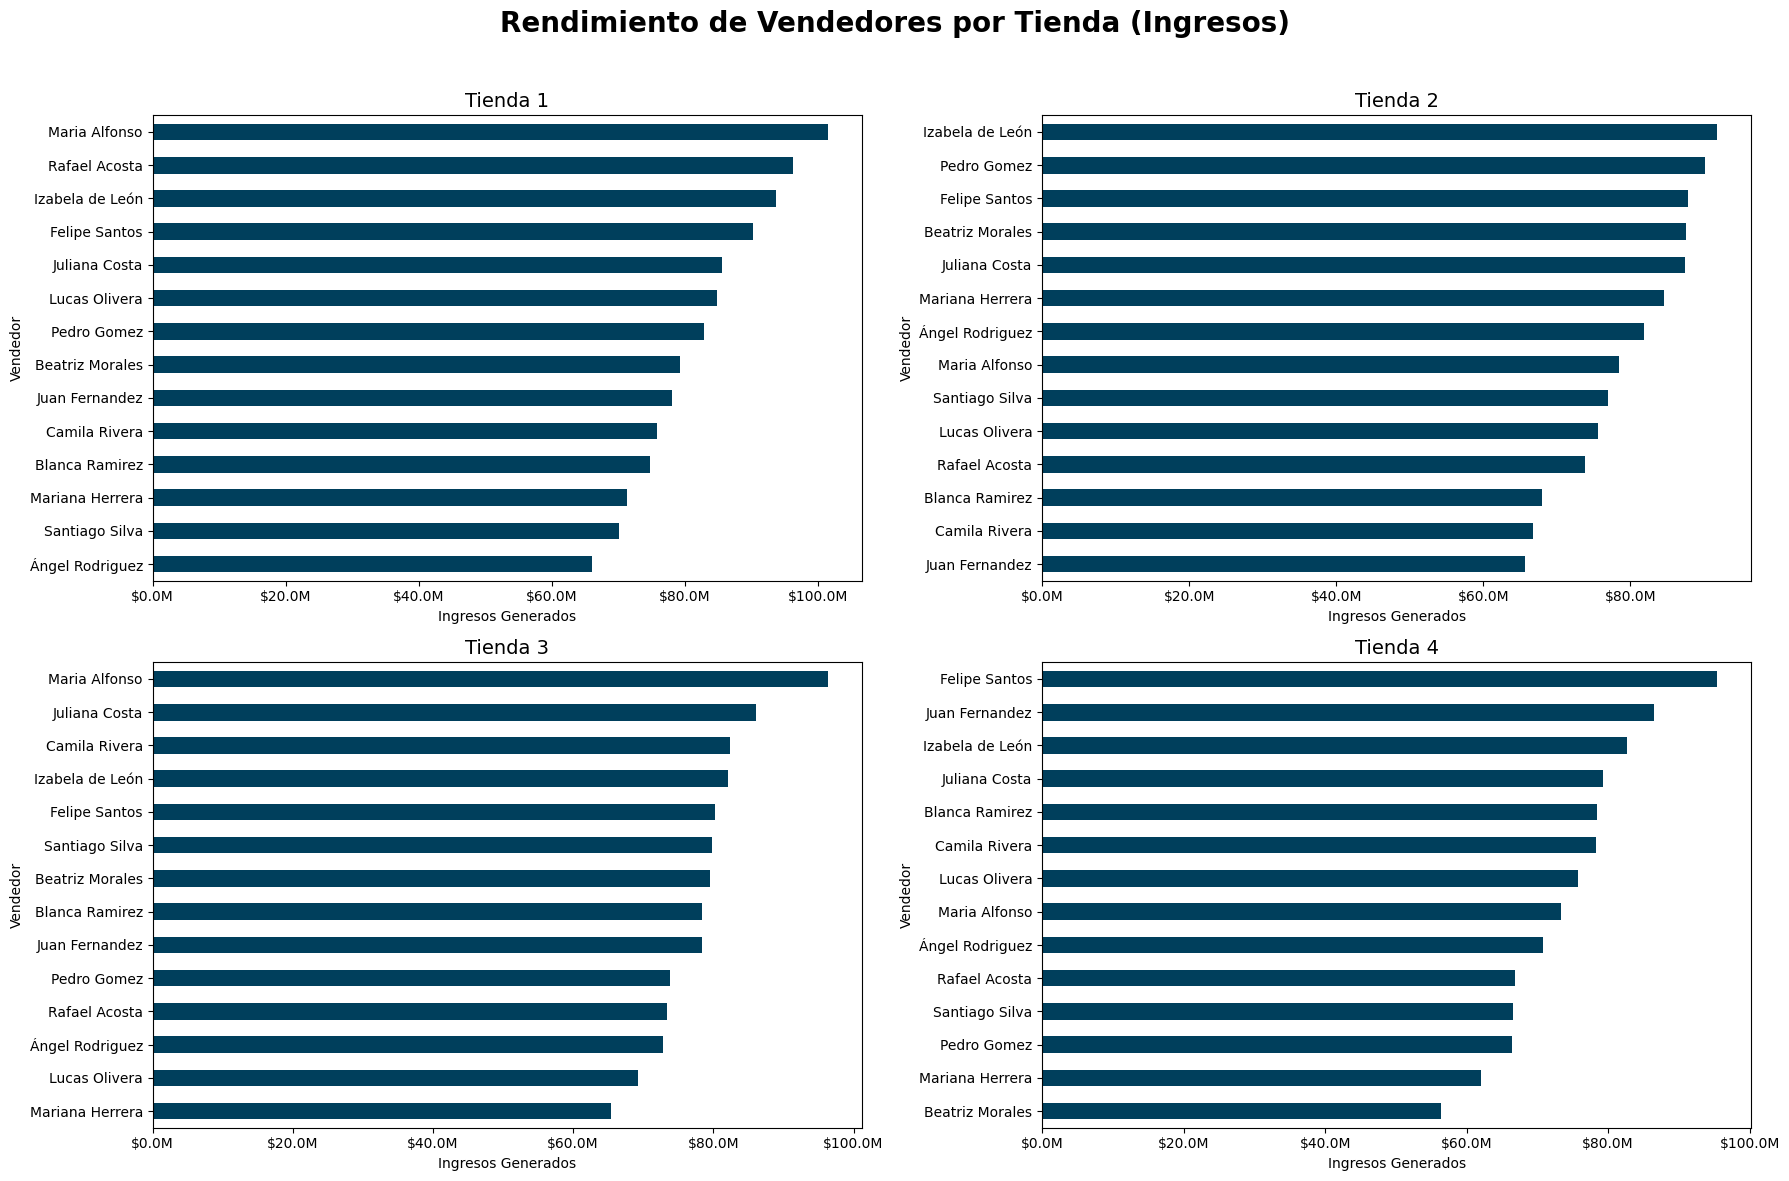

In [95]:
rendimiento_t1 = tienda1.groupby('Vendedor')['Precio'].sum().sort_values(ascending=True)
rendimiento_t2 = tienda2.groupby('Vendedor')['Precio'].sum().sort_values(ascending=True)
rendimiento_t3 = tienda3.groupby('Vendedor')['Precio'].sum().sort_values(ascending=True)
rendimiento_t4 = tienda4.groupby('Vendedor')['Precio'].sum().sort_values(ascending=True)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Rendimiento de Vendedores por Tienda (Ingresos)', fontsize=20, weight='bold')
datos_vendedores = [rendimiento_t1, rendimiento_t2, rendimiento_t3, rendimiento_t4]
titulos = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Grafica
for i, ax in enumerate(axes.flatten()):
    datos_vendedores[i].plot(kind='barh', ax=ax, color='#003f5c')
    ax.set_title(titulos[i], fontsize=14)
    ax.set_xlabel('Ingresos Generados')

    formatter = mticker.FuncFormatter(lambda x, p: f'${x/1_000_000:.1f}M')
    ax.xaxis.set_major_formatter(formatter)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

* **Vendedores**: El análisis de rendimiento por vendedor demostró que el problema es sistémico en la tienda. Los mejores vendedores de la Tienda 4 apenas alcanzan el nivel de los vendedores de rendimiento medio de las demas Tiendas. Esto significa que no es un problema de un mal empleado, sino un desafío general de esa sucursal.

**El Único Punto a Favor (y por qué no es suficiente)**
La Tienda 4 tiene el costo de envío promedio más bajo. Sin embargo, esta ventaja logística no se ha traducido en un mayor volumen de ventas ni en mayores ingresos, demostrando que no es un factor lo suficientemente fuerte como para impulsar su crecimiento.

***En Conclusión:***

La decisión de vender la Tienda 4 es la más estratégica. No se basa en una sola métrica, sino en un conjunto de pruebas contundentes que apuntan en la misma dirección: es la tienda con menor rentabilidad, menor volumen de ventas, rendimiento histórico más bajo y menor alcance de mercado. Su venta permitirá  obtener capital para el nuevo emprendimiento, sacrificando la unidad de negocio menos productiva de su cadena.